# 1. Load and normalize 


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),transforms.Resize((100,100)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32
classes = ('Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag')
trainset = torchvision.datasets.ImageFolder(root='train/', transform=transform)
                                         
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
                                         

testset = torchvision.datasets.ImageFolder(root='test/', transform=transform)
                                       
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=2)
                                         



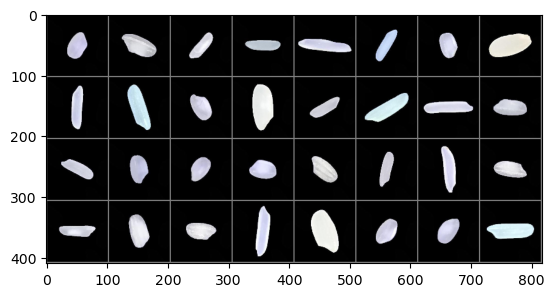

Karacadag Arborio Jasmine Jasmine Basmati Jasmine Karacadag Ipsala Basmati Jasmine Karacadag Ipsala Jasmine Jasmine Basmati Arborio Jasmine Karacadag Karacadag Karacadag Arborio Jasmine Basmati Arborio Jasmine Arborio Arborio Basmati Ipsala Karacadag Karacadag Jasmine


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:6s}' for j in range(batch_size)))

# 2. Define a Convolutional Neural Network

Copy the neural network from the Neural Networks section before and modify it to take 3-channel images (instead of 1-channel images as it was defined.

In [15]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__() #super() lets you avoid referring to the base class explicitly,
        # which can be nice. But the main advantage comes with multiple inheritance, where all sorts of fun stuff can happen.
        self.conv1 = nn.Conv2d(in_channels=3,out_channels= 12,kernel_size=3,padding= 1)
        self.bn1=nn.BatchNorm2d(num_features=12)
        self.pool1= nn.MaxPool2d(kernel_size=2)
        self.relu1=nn.ReLU()
        
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=20,padding=1,kernel_size= 3)
        self.bn2= nn.BatchNorm2d(num_features=20)
        self.relu2=nn.ReLU()
        
        self.conv3 = nn.Conv2d(in_channels=20,out_channels= 32,kernel_size=3,padding= 1)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.pool3= nn.MaxPool2d(kernel_size=2)
        self.relu3=nn.ReLU()
        
        self.fc1 = nn.Linear(32*25*25, 5)
        

    def forward(self, x):
        x = self.conv1(x) 
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        

        
        x = torch.flatten(x, 1)     # flatten all dimensions except batch
        
        x = x.view(-1,32*25*25)

        x = self.fc1(x)
        return x


net = Net()

# 3. Define a Loss function and optimizer

Let’s use a Classification Cross-Entropy loss and SGD with momentum.

In [16]:
import torch.optim as optim

Loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 4. Train the network

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [17]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = Loss(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


In [18]:
PATH = './RICE PYTORCH.pth'
torch.save(net.state_dict(), PATH)

# 5. Test the network on the test data

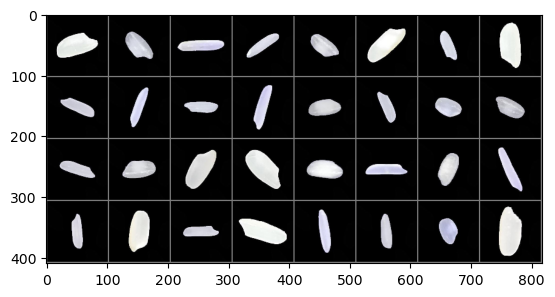

GroundTruth:  Ipsala Arborio Basmati Jasmine Arborio Ipsala Jasmine Ipsala Jasmine Basmati Jasmine Basmati Arborio Jasmine Karacadag Arborio Jasmine Arborio Ipsala Ipsala Arborio Basmati Arborio Basmati Jasmine Ipsala Jasmine Ipsala Basmati Jasmine Karacadag Ipsala


In [22]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:4s}' for j in range(32)))